In [27]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

In [28]:
video_clip = VideoFileClip("./video.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio.wav")

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


In [29]:
sample_rate, data = wavfile.read("extracted_audio.wav")
data = data/np.max(np.abs(data))

In [30]:
data_transformed = np.max(data, axis=1)
data_transformed = data_transformed.reshape(-1, 1)

In [31]:
chunk_size = 10100
threshold = 0.2

In [32]:
data_flat = data_transformed.flatten()
modified_data = np.where(data_flat > threshold, data_flat, 0)
indices = np.arange(len(data_flat))
peaks, _ = find_peaks(modified_data)

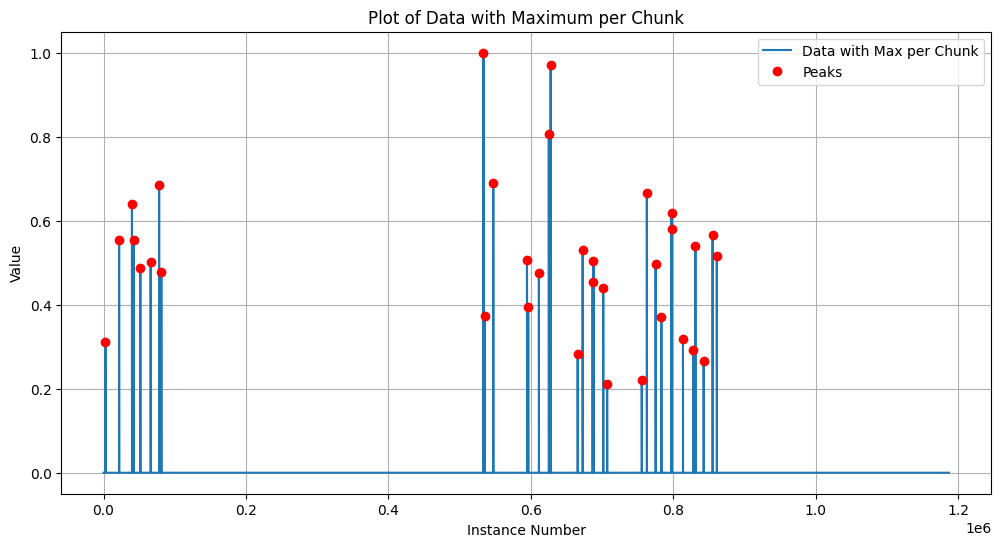

In [33]:
data_flat = modified_data.flatten()  

new_data = np.zeros_like(data_flat)

for i in range(0, len(data_flat), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(data_flat))
    chunk = data_flat[start_idx:end_idx]
    
    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

peaks, _ = find_peaks(new_data)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(new_data, label='Data with Max per Chunk')

ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')

ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

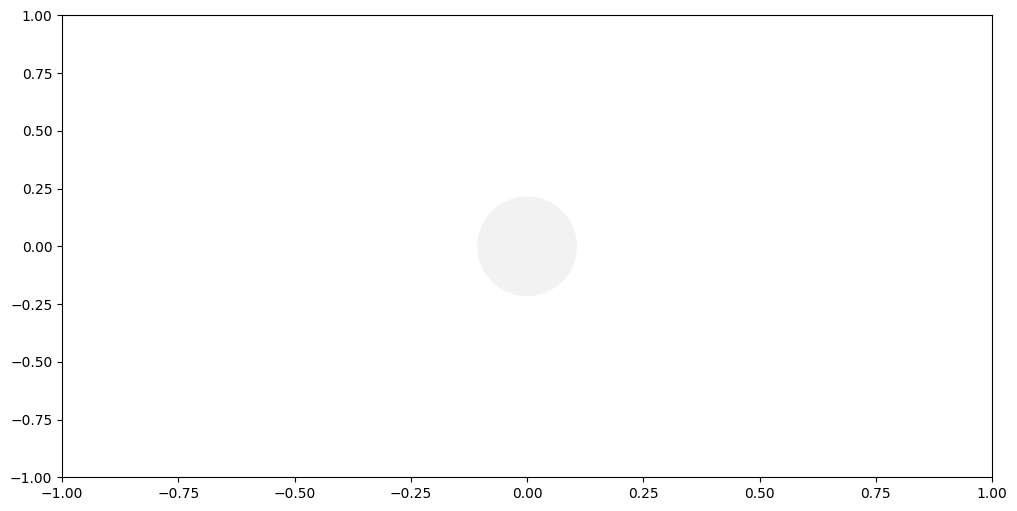

In [35]:

peak_values = new_data[peaks]

sizes = peak_values * 10000  

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')  
fig.patch.set_alpha(0)    

sc = ax.scatter([0], [0], s=sizes[0], c='gray', alpha=0.1, edgecolor='none')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

def update(frame):
    current_size = sizes[frame]
    sc.set_sizes([current_size])

    return sc,

ani = animation.FuncAnimation(fig, update, frames=len(peaks), interval=1000, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})